In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from functools import reduce
from statistics import mean

# I. Forecasting

## 1. Visualize and interpret the pattern of this time-series

In [3]:
sales_df = pd.DataFrame({'Month': [1,2,3,4,5,6,7,8,9,10,11,12], 
                         'Sales': [5384, 8081, 10282, 9156, 6118, 9139, 12460, 10717, 7825, 9693, 15177, 10990]})

In [4]:
sales_df

,Month,Sales
0,1,5384
1,2,8081
2,3,10282
3,4,9156
4,5,6118
5,6,9139
6,7,12460
7,8,10717
8,9,7825
9,10,9693


([<matplotlib.axis.XTick at 0x7fef4c3ce8d0>,
 <a list of 12 Text xticklabel objects>)

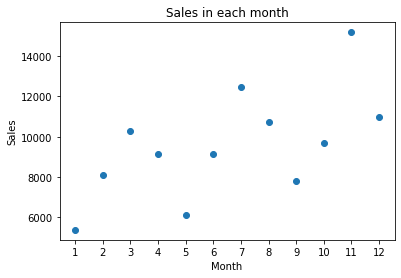

In [79]:
plt.scatter(sales_df['Month'], sales_df['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales in each month')
plt.xticks(np.arange(1, 13, step=1))

In [30]:
sales = sales_df['Sales'].tolist()
def calculateMA(lst, size, number):
    tmp = lst
    for i in range(number):
        tmp.append(round(mean(lst[-size::]),2))
    return tmp

In [31]:
calculateMA(sales, 3, 4)

[5384,
 8081,
 10282,
 9156,
 6118,
 9139,
 12460,
 10717,
 7825,
 9693,
 15177,
 10990,
 11953.33,
 12706.78,
 11883.37,
 12181.16]

In [ ]:
def calculateEM(lst)

# II. Recommender Systems

## 1. Basics of RecAlg

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
data = {'Desperados': [4, 1, np.nan, 4], 'Guinness': [3, 2, 2, 3], 'chimay triple': [2, 3, 1, np.nan], 'Leffe': [3, 1, np.nan, np.nan]}
index = ['ICT', 'Medicine', 'Business', 'Environment']
df = pd.DataFrame(data=data, index = index)

In [4]:
df

,Desperados,Guinness,chimay triple,Leffe
ICT,4.0,3,2.0,3.0
Medicine,1.0,2,3.0,1.0
Business,NaN,2,1.0,NaN
Environment,4.0,3,NaN,NaN


In [5]:
df.fillna(0)

,Desperados,Guinness,chimay triple,Leffe
ICT,4.0,3,2.0,3.0
Medicine,1.0,2,3.0,1.0
Business,0.0,2,1.0,0.0
Environment,4.0,3,0.0,0.0


In [7]:
cosine_similarity(df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## 2. Movie Recommendation

In [4]:
movies_df = pd.read_csv('movies.csv', encoding='latin-1')
users_df = pd.read_csv('users.csv')
ratings_df = pd.read_csv('ratings.csv')

In [27]:
# Fill NA values in genres with null
movies_df['genres'].fillna('null', inplace=True)
movies_df.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [56]:
# One longggggggg line to collect all genres of movies 
genres = list(dict.fromkeys([x for sublist in [row['genres'].split('|') if row['genres'].find('|') != 1 else rows['genres'] for index, row in movies_df.iterrows()] for x in sublist]))
genres.remove('null')
genres

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Sci-Fi',
 'Documentary',
 'War',
 'Musical']